In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

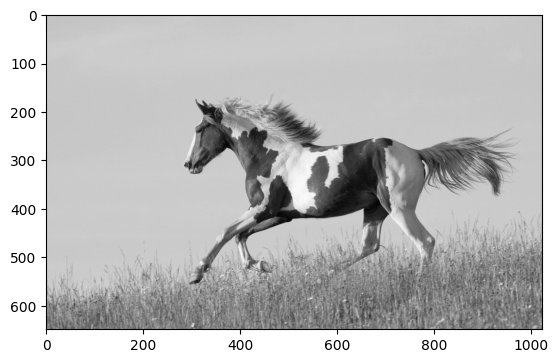

In [25]:
import os

img = cv.imread("opencv/img/horse.jpg",0)
plt.imshow(img,cmap='gray')

# 1. Sobel算子
基于一阶倒数，一阶导数最大的地方就是边缘点，平方后开方求莫得到y的值

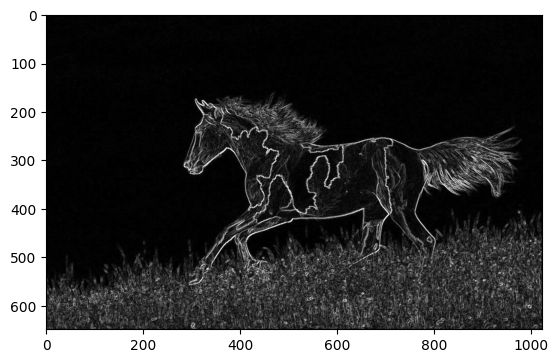

In [27]:
# x y方向计算sobel算子
x = cv.Sobel(img,cv.CV_16S,1,0)
y = cv.Sobel(img,cv.CV_16S,0,1)
# 转换大小
absx = cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)
res = cv.addWeighted(absx,0.5,absy,0.5,0) # 混合
plt.imshow(res,cmap='gray') # 显示

# 2. Schaar算子
类似Sobel算子，但是结果比Sobel更精细，因为卷积核矩阵从1变为了3

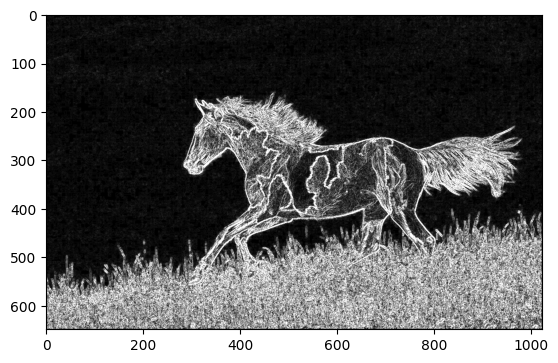

In [28]:
# 设置参数ksize=-1，计算Schaar算子
x = cv.Sobel(img,cv.CV_16S,1,0,ksize=-1)
y = cv.Sobel(img,cv.CV_16S,0,1,ksize=-1)
# 转换大小
absx = cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)
res = cv.addWeighted(absx,0.5,absy,0.5,0) # 混合
plt.imshow(res,cmap='gray') # 显示

# 3.Laplacian算子
零穿越，寻找二阶导数过零点的位置（也就是一阶导数最大的位置）

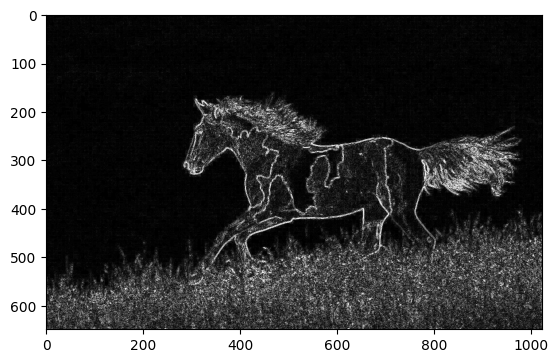

In [29]:
res = cv.Laplacian(img,cv.CV_16S,ksize=3)
res = cv.convertScaleAbs(res)
plt.imshow(res,cmap='gray') # 显示

# 4. Canny边缘检测
被誉为最优的边缘检测算法，包含四步骤：
1.噪声去除
2.计算图像梯度（大小、方向）
3.非极大值抑制
4.滞后阈值

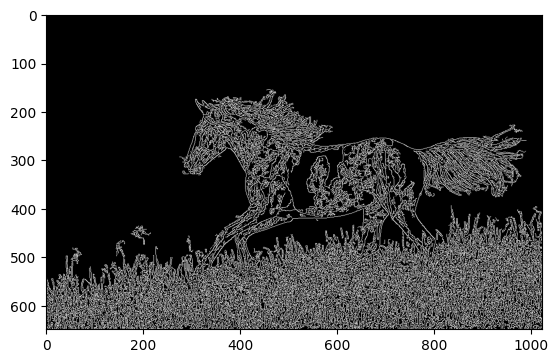

In [40]:
low_threshold = 0
max_threshold = 100
canny = cv.Canny(img,low_threshold,max_threshold)
plt.imshow(canny,cmap='gray')